<a href="https://colab.research.google.com/github/DrKamaleshR/CVD-classification/blob/main/CVDriskclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

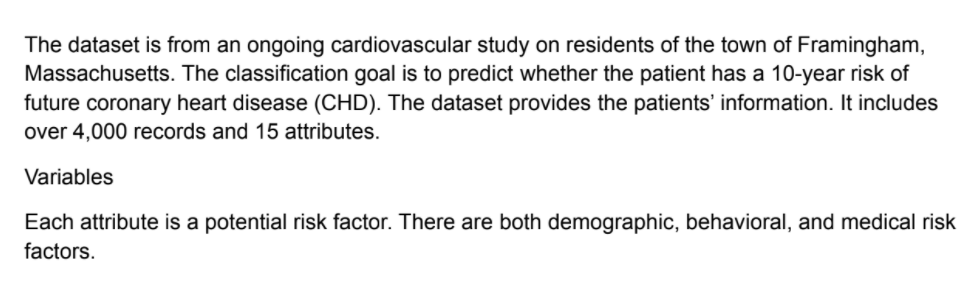

Data Description
Demographic:
- Sex: male or female("M" or "F")
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
- is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)
Predict variable (desired target)
- 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV





In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import chi2, chi2_contingency, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, recall_score, precision_score,\
 accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
import xgboost as xgb

In [3]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [4]:
from catboost import CatBoostClassifier

In [5]:
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
CVDCdf=pd.read_csv("/content/drive/MyDrive/almabetter projects/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv")

In [8]:
CVDCdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
CVDCdf.shape

(3390, 17)

In [10]:
CVDCdf.drop('id', axis = 1, inplace = True)

In [11]:
CVDCdf.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


EXPLORATORY DATA ANALYSIS

In [12]:
#Checking for NaN values
CVDCdf.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

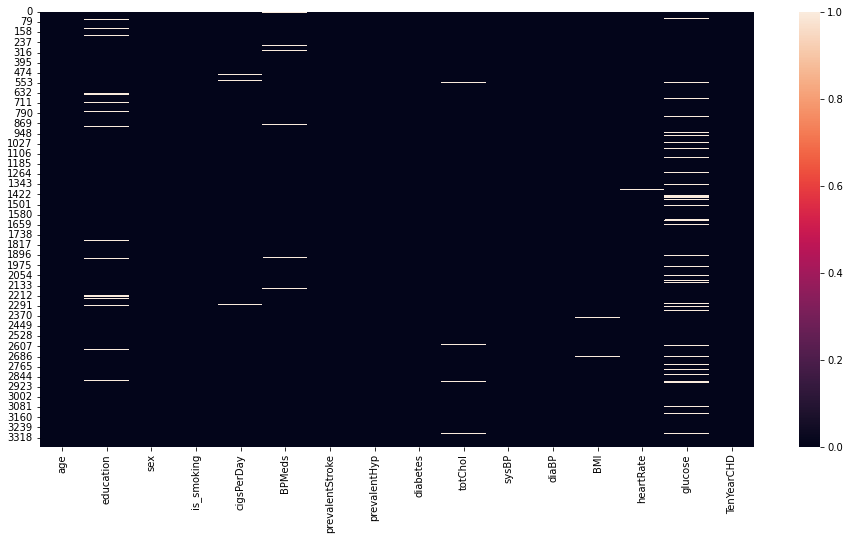

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(CVDCdf.isnull())

We can see education,cigsPerDay,BPMeds,totChol,BMI,heartRate and glucose have NaN values





In [14]:
CVDCdf.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


Handling missing values by replacing NaN values with mean for numeric values


In [15]:
CVDCdf['education'].fillna(2,inplace=True)
CVDCdf['cigsPerDay'].fillna(18,inplace=True)
CVDCdf['BPMeds'].fillna(0,inplace=True)
CVDCdf['totChol'].fillna(234,inplace=True)
CVDCdf['BMI'].fillna(25,inplace=True)
CVDCdf['heartRate'].fillna(75,inplace=True)
CVDCdf['glucose'].fillna(82,inplace=True)

In [16]:
CVDCdf.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#Missing values handled

**UNIVARIATE** **ANALYSIS**

In [17]:
#Numeric Variables
CVDdfN=['age', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate','cigsPerDay','glucose']

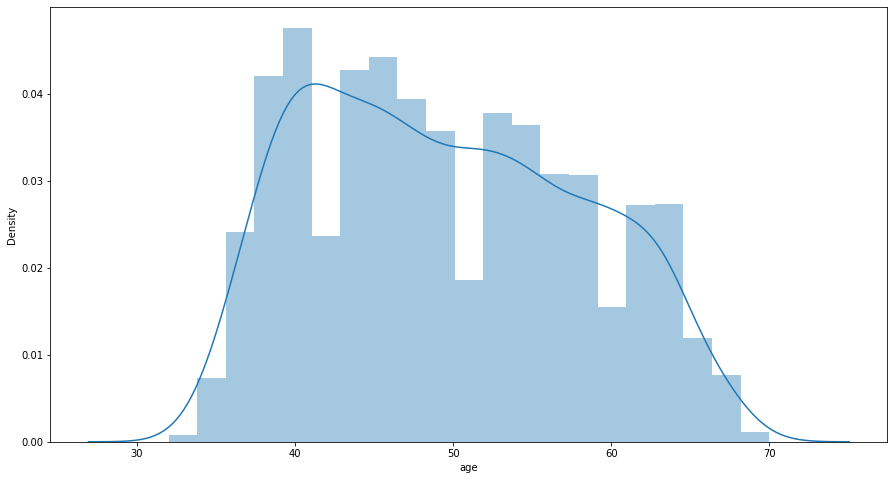

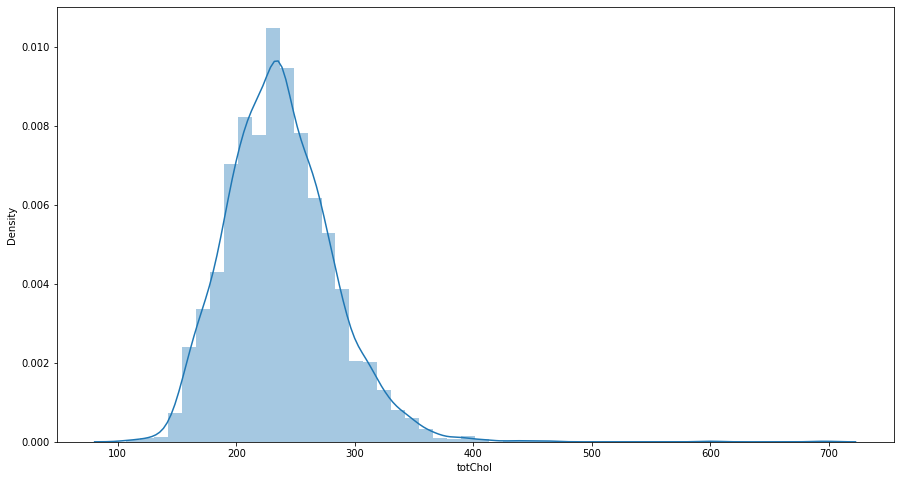

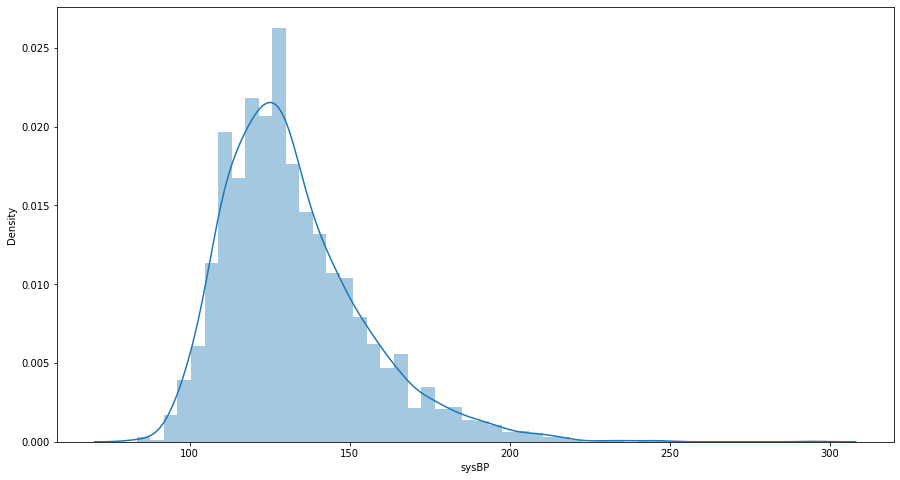

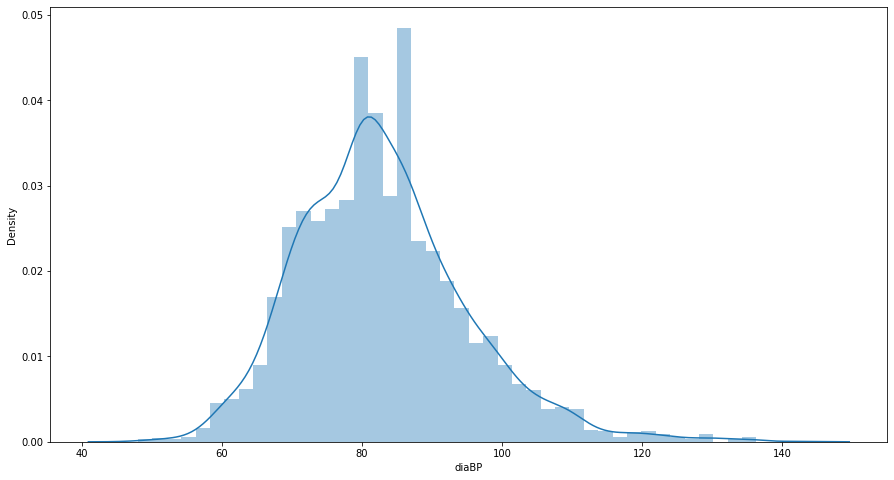

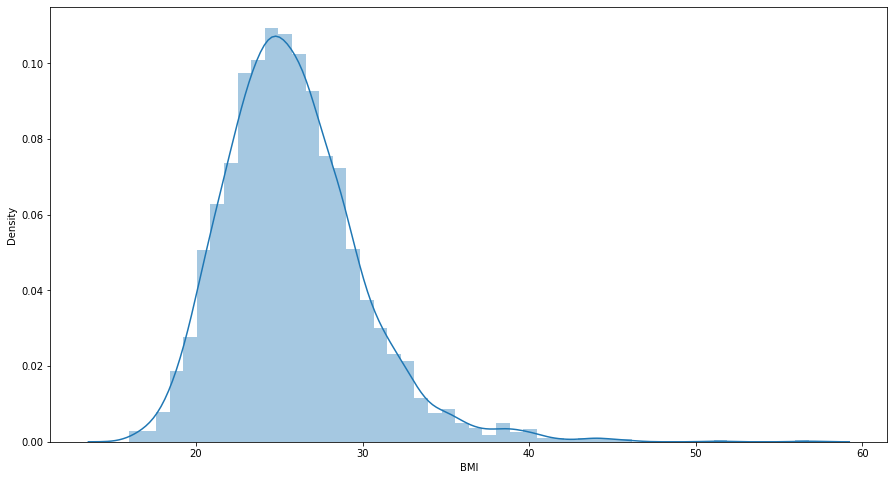

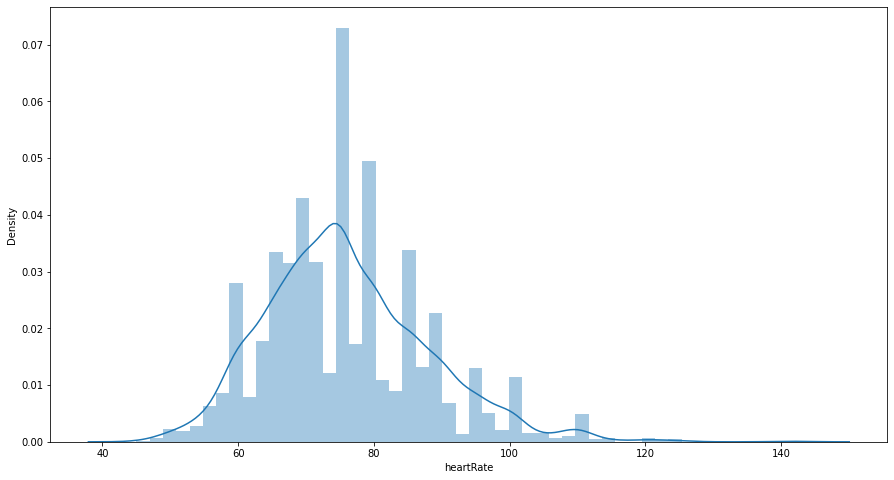

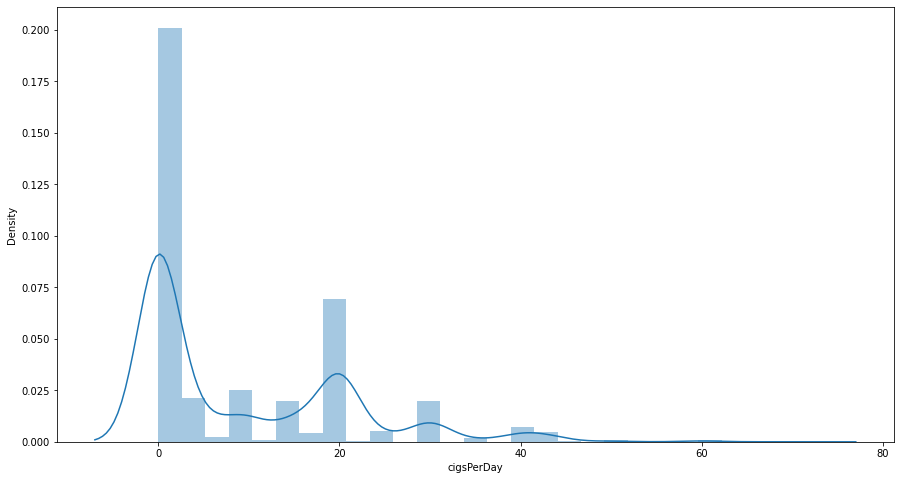

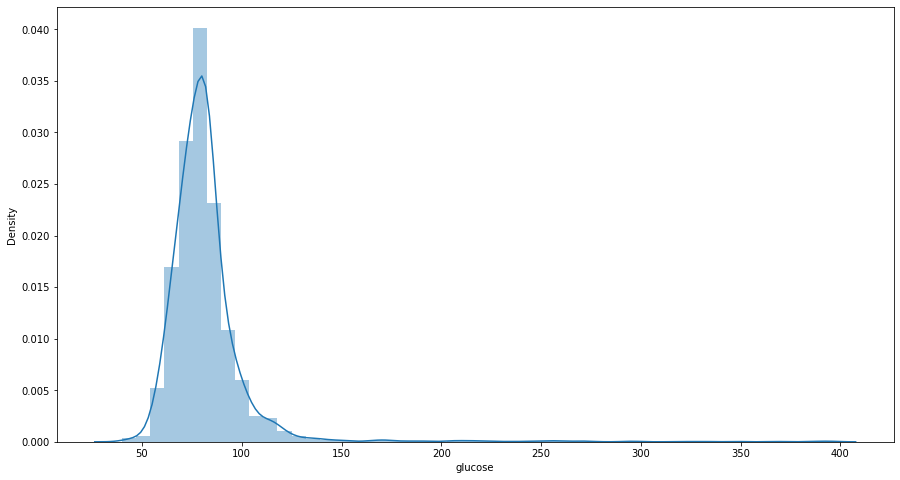

In [18]:
for i in CVDdfN:
  plt.figure(figsize=(15,8))
  sns.distplot(CVDCdf[i])

In [19]:
CVDdfC=['education', 'sex', 'is_smoking',  'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

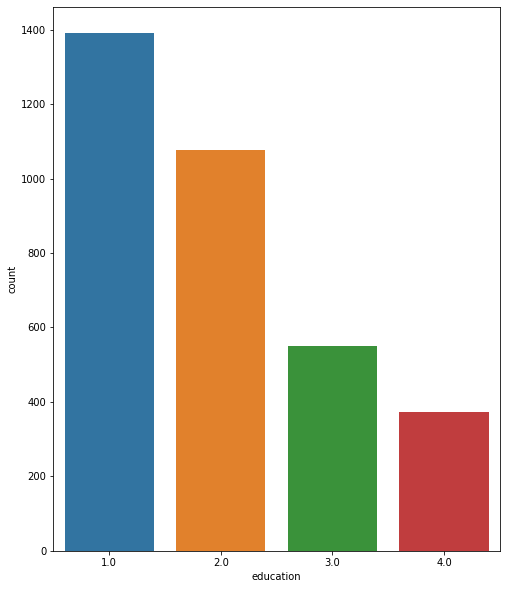

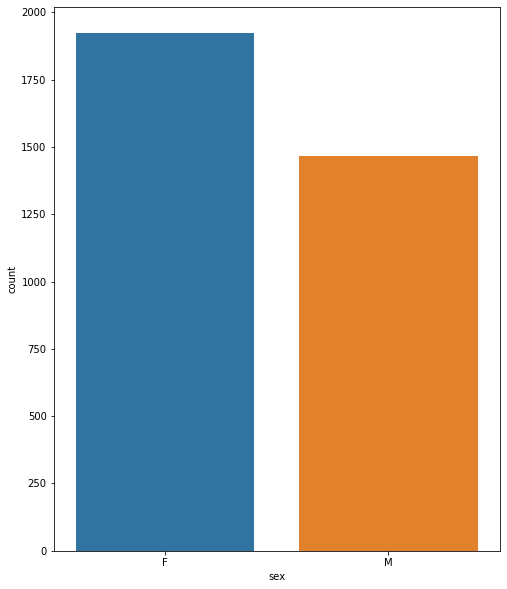

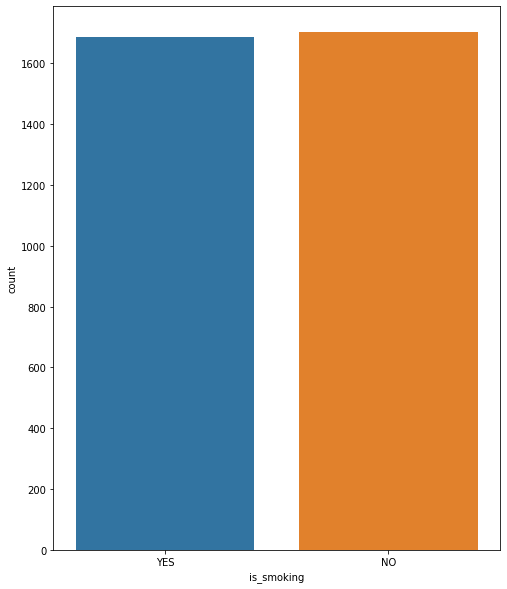

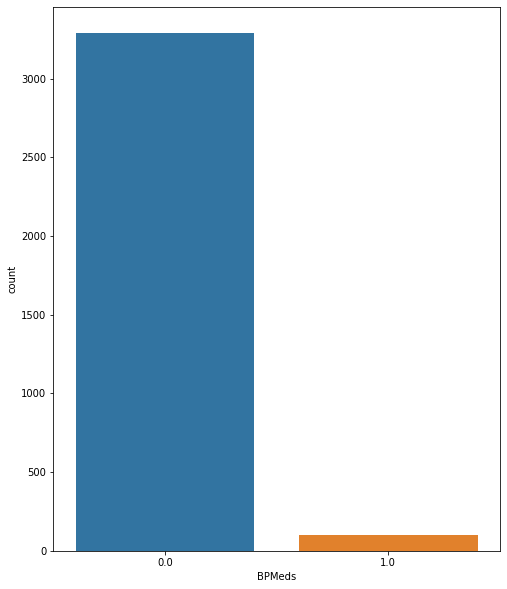

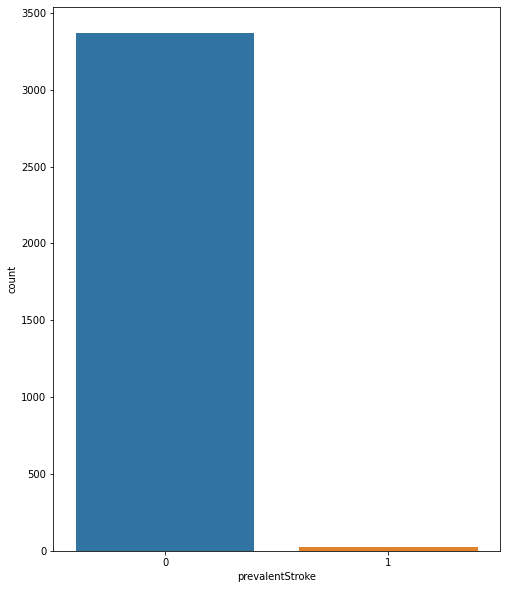

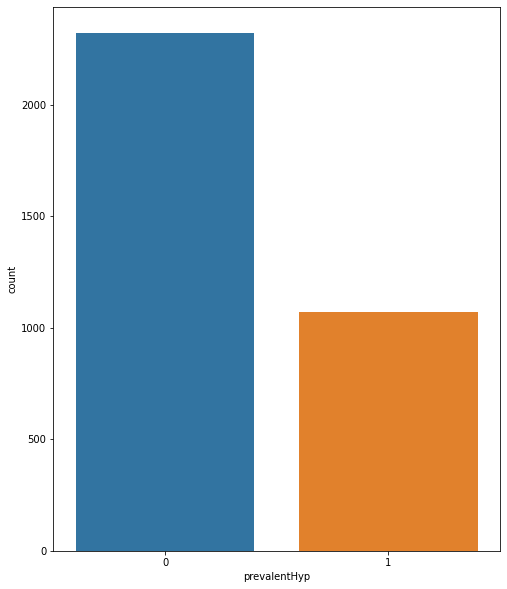

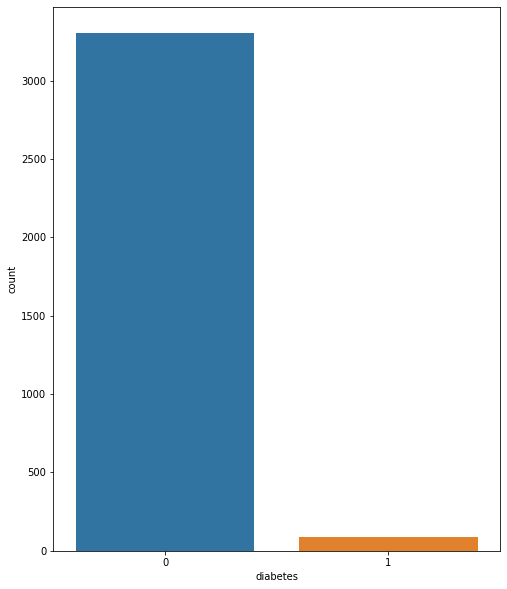

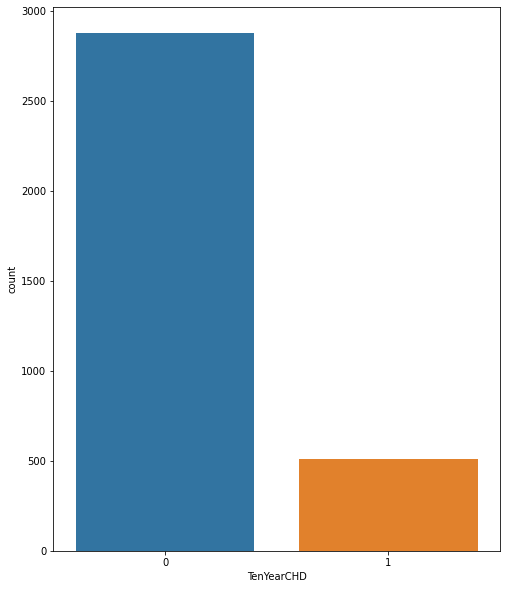

In [20]:
for i in CVDdfC:
  plt.figure(figsize=(8,10))
  sns.countplot(CVDCdf[i])

**BIVARIATE** **ANALYSIS**

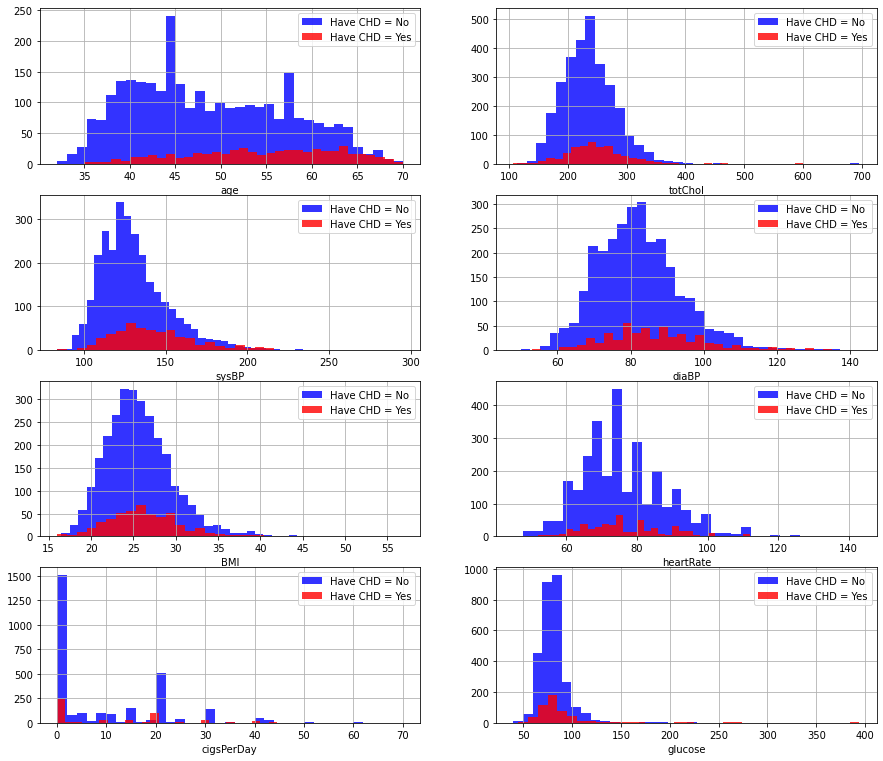

In [21]:
#Continous variables vs CHD incidence
plt.figure(figsize=(15, 20))

for i, column in enumerate(CVDdfN, 1):
    plt.subplot(6, 2, i)
    CVDCdf[CVDCdf["TenYearCHD"] == 0][column].hist(bins=35, color='blue', label='Have CHD = No', alpha=0.8)
    CVDCdf[CVDCdf["TenYearCHD"] == 1][column].hist(bins=35, color='red', label='Have CHD = Yes', alpha=0.8)
    plt.legend()
    plt.xlabel(column)

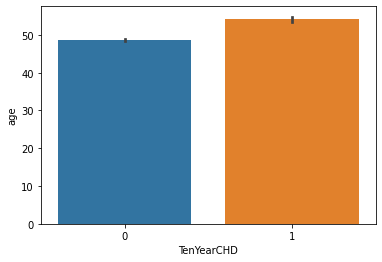

In [22]:
sns.barplot(x="TenYearCHD", y="age", data=CVDCdf)

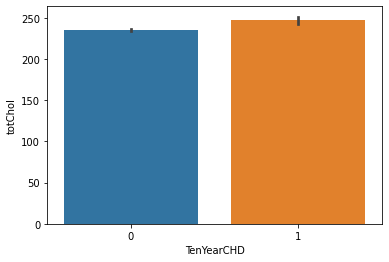

In [23]:
sns.barplot(x="TenYearCHD", y="totChol", data=CVDCdf)

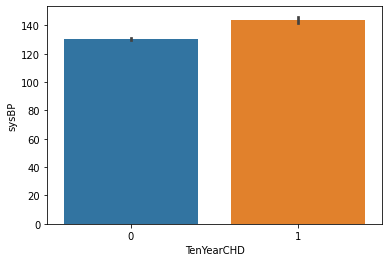

In [24]:
sns.barplot(x="TenYearCHD", y="sysBP", data=CVDCdf)

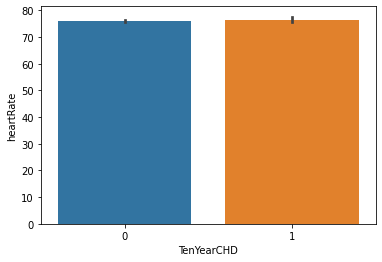

In [25]:
sns.barplot(x="TenYearCHD", y="heartRate", data=CVDCdf)

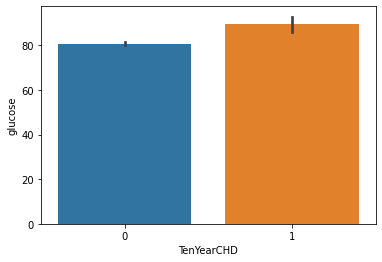

In [26]:
sns.barplot(x="TenYearCHD", y="glucose", data=CVDCdf)

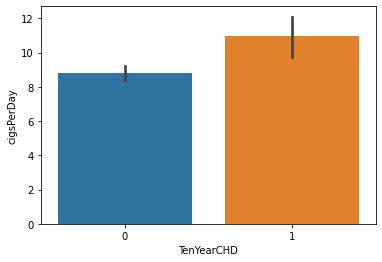

In [27]:
sns.barplot(x="TenYearCHD", y="cigsPerDay", data=CVDCdf)

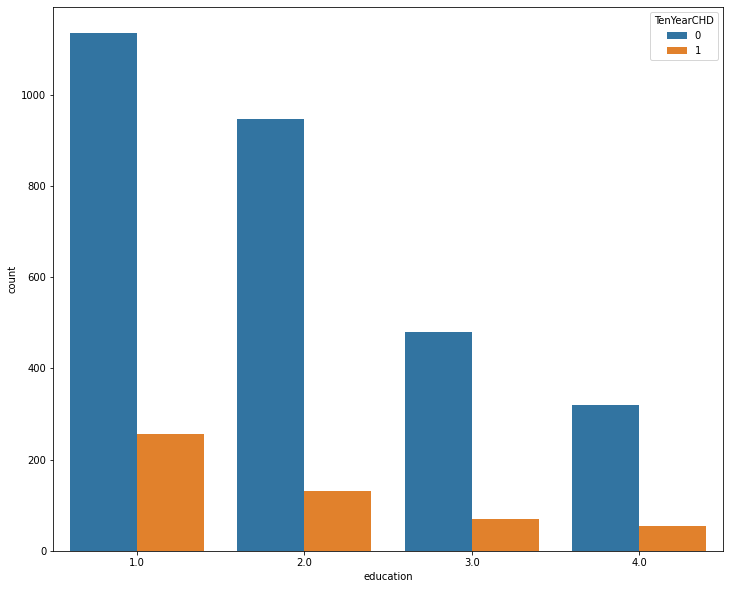

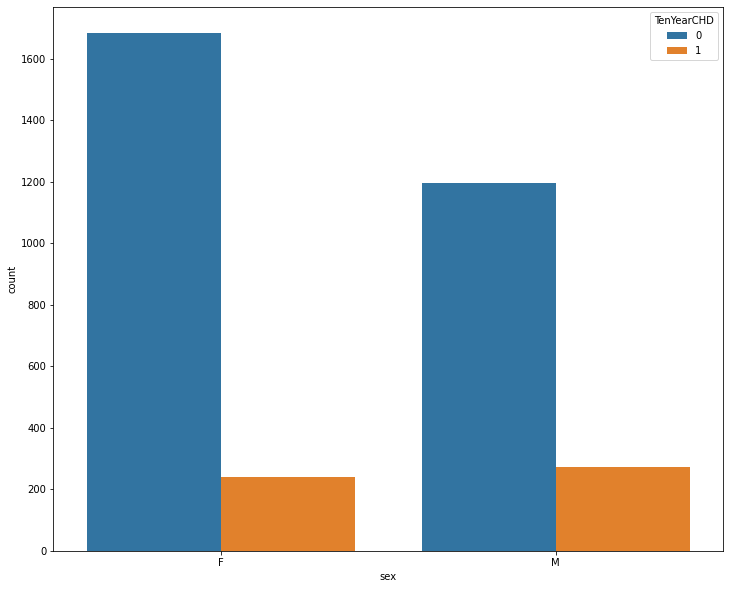

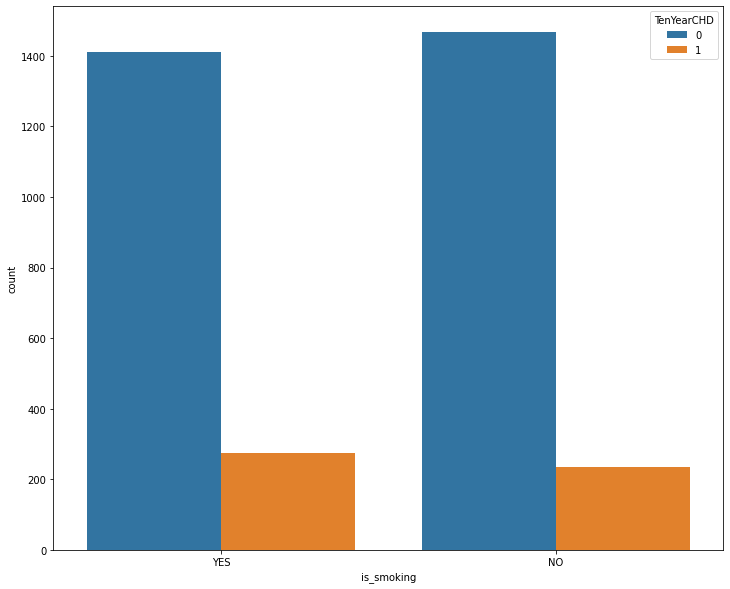

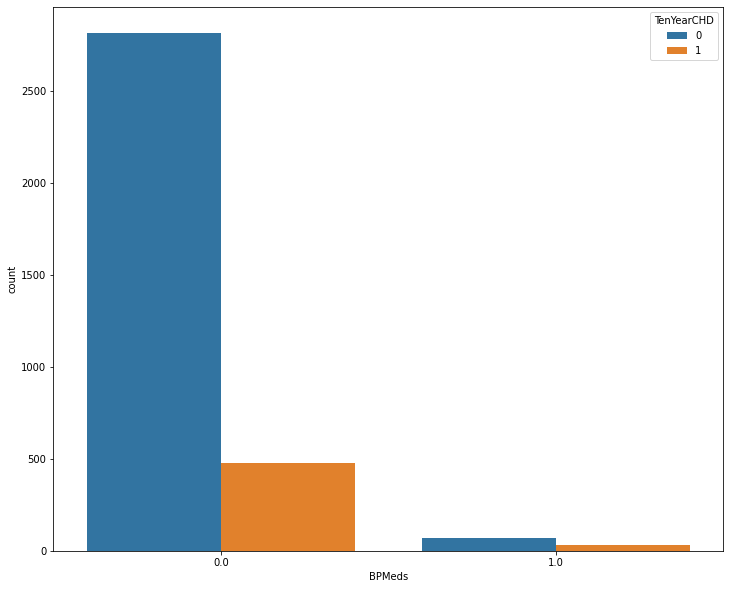

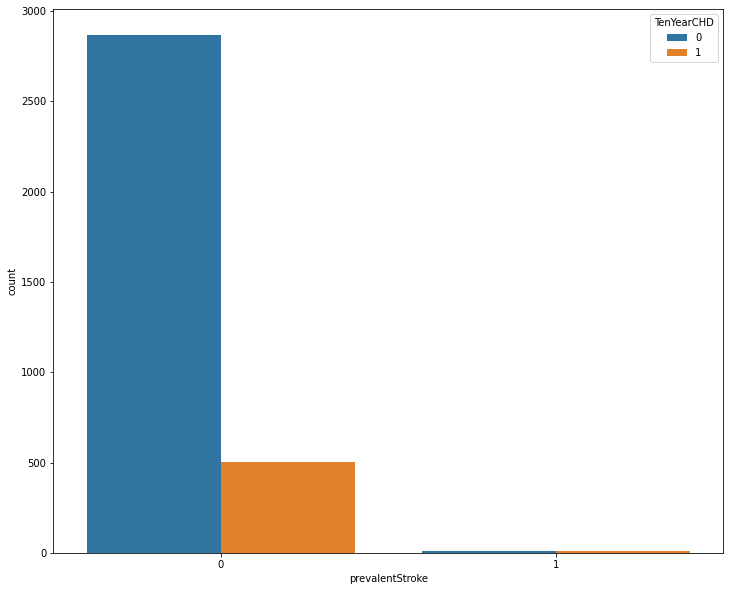

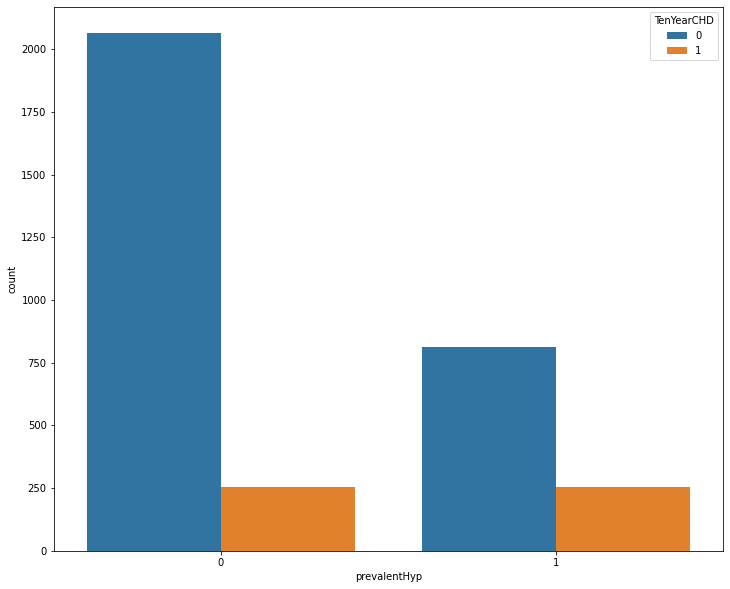

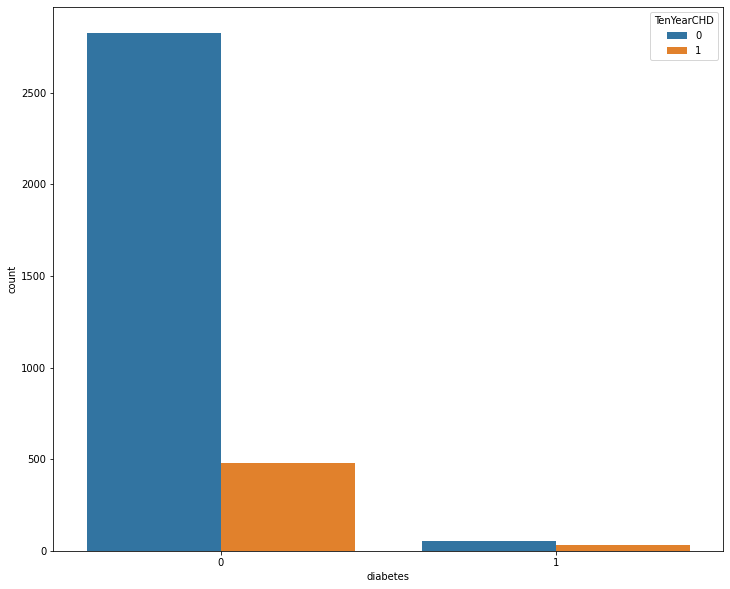

In [28]:
CVDdfC=['education', 'sex', 'is_smoking',  'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes']
for i in CVDdfC:
  plt.figure(figsize=(12,10))
  sns.countplot(CVDCdf[i],hue=CVDCdf['TenYearCHD'])

(14.5, -0.5)

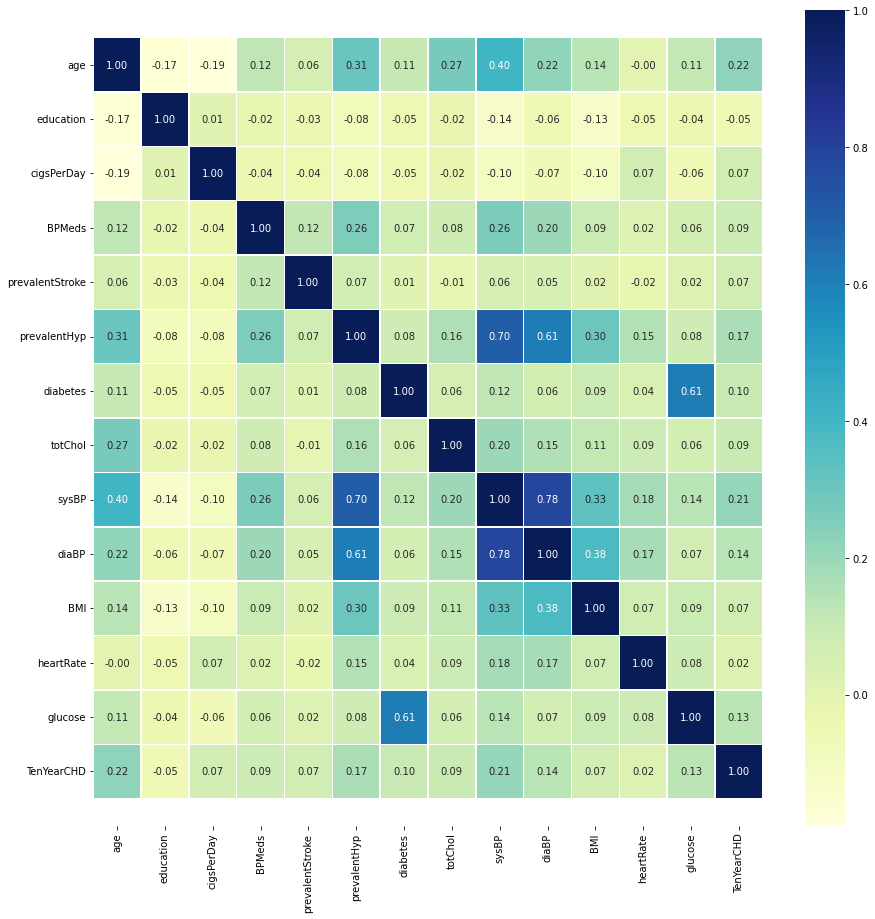

In [29]:
#
corr_matrix = CVDCdf.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

INFERENCE :

1.High correlation between variables exists in systolic BP and diastolic BP.

2.Systolic and Diastolic BP have correlation between hypertension and BMI.

3.Systolic BP and age have a positive correleation.

4.Variables such as age, prevalent hypertension, systolic BP, diastolic BP, and glucose influence the risk of heart disease mainly.

5.High correlation between independent variables leads to Multicollinearity which should be handled properly.

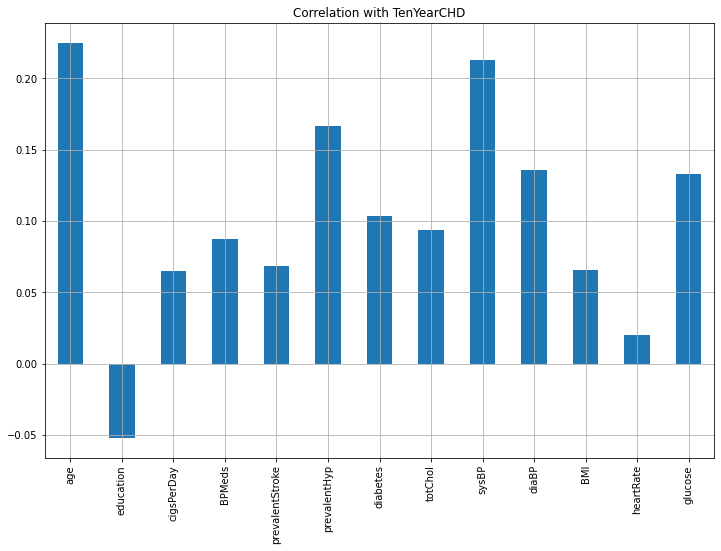

In [30]:
CVDCdf.drop('TenYearCHD', axis=1).corrwith(CVDCdf.TenYearCHD).plot(kind='bar', grid=True,figsize=(12, 8), 
                                                   title="Correlation with TenYearCHD")

Handling Multicollinearity

In [31]:
#Adding new variable Pulse Pressure(SBP-DBP)
CVDCdf['PP']=CVDCdf['sysBP'] - CVDCdf['diaBP']
#Dropping variables with Multicollinearity
#Dropping 'prevalencehyp','sysBP' and 'diaBP' as they are highly correlated to Pulse pressure
CVDCdf.drop(['sysBP','diaBP','prevalentHyp'], axis = 1, inplace = True)



In [32]:
#since prevelence of diabetes is dependent on Blood glucose values, we need to drop 'diabetes'.

CVDCdf.drop(['diabetes'], axis = 1, inplace = True)


In [33]:
#we can drop is smoking too as 'cigsperday' is present
CVDCdf.drop(['is_smoking'], axis = 1, inplace = True)

In [34]:
CVDCdf.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,totChol,BMI,heartRate,glucose,TenYearCHD,PP
0,64,2.0,F,3.0,0.0,0,221.0,25.00,90.0,80.0,1,63.0
1,36,4.0,M,0.0,0.0,0,212.0,29.77,72.0,75.0,0,70.0
2,46,1.0,F,10.0,0.0,0,250.0,20.35,88.0,94.0,0,45.0
3,50,1.0,M,20.0,0.0,0,233.0,28.26,68.0,94.0,1,70.0
4,64,1.0,F,30.0,0.0,0,241.0,26.42,70.0,77.0,0,51.5


In [35]:
CVDCdf.shape

(3390, 12)

In [34]:
CVDCdf['sex'] = np.where(CVDCdf['sex'] == "F", 1, 0)
CVDCdf.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,totChol,BMI,heartRate,glucose,TenYearCHD,PP
0,64,2.0,1,3.0,0.0,0,221.0,25.00,90.0,80.0,1,63.0
1,36,4.0,0,0.0,0.0,0,212.0,29.77,72.0,75.0,0,70.0
2,46,1.0,1,10.0,0.0,0,250.0,20.35,88.0,94.0,0,45.0
3,50,1.0,0,20.0,0.0,0,233.0,28.26,68.0,94.0,1,70.0
4,64,1.0,1,30.0,0.0,0,241.0,26.42,70.0,77.0,0,51.5


**Data** **Processing**

In [35]:
#creating dummies for variables having more than 2 categories
Dummy=['education']

In [52]:
#scaling dataset
dataset = pd.get_dummies(CVDCdf, columns = Dummy)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'totChol', 'BMI','heartRate']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [53]:
dataset.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,totChol,BMI,heartRate,glucose,TenYearCHD,PP,education_1.0,education_2.0,education_3.0,education_4.0
0,1.682783,1,3.0,0.0,0,-0.356539,-0.192780,1.171675,80.0,1,63.0,0,1,0,0
1,-1.576210,0,0.0,0.0,0,-0.556594,0.968750,-0.332292,75.0,0,70.0,0,0,0,1
2,-0.412284,1,10.0,0.0,0,0.288084,-1.325090,1.004567,94.0,0,45.0,1,0,0,0
3,0.053287,0,20.0,0.0,0,-0.089799,0.601054,-0.666507,94.0,1,70.0,1,0,0,0
4,1.682783,1,30.0,0.0,0,0.088028,0.153000,-0.499400,77.0,0,51.5,1,0,0,0


In [55]:
dataset.shape

(3390, 15)

In [39]:
CVDCdf['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [47]:
list(dataset.columns.values)

['age',
 'sex',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'totChol',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD',
 'PP',
 'education_1.0',
 'education_2.0',
 'education_3.0',
 'education_4.0']

In [60]:
#imbalance in classes, we can use Synthetic Minority Oversampling Technique(SMOTE)
from imblearn.over_sampling import SMOTE
smote=SMOTE()
#independent and dependent variables
IV=['age',
 'sex',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'totChol',
 'BMI',
 'heartRate',
 'glucose',
 'PP',
 'education_1.0',
 'education_2.0',
 'education_3.0',
 'education_4.0']
DV='TenYearCHD'
X=dataset.loc[:,IV]
y=dataset[DV]


In [61]:
X,y = smote.fit_resample(X,y)

In [62]:
len(X)

5758

In [63]:

len(y)

5758

Scaling data

In [64]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
X = MMS.fit_transform(X)

Seven models will be trained and validated in this project
1. Logistic Regression
2. Random Forest
3. XGB Classifier
4. KNN
5. AdaaBoost Classifier
6.CatBoost Classifier
7.SVM

In [65]:
# Creating a dictionary for models
ClassModels = {'Logistic Regression' : LogisticRegression(),
              'Random Forest' : RandomForestClassifier(),
              'XGB Classifier' : XGBClassifier(),
              'KNN' : KNeighborsClassifier(),
              'AdaBoost': AdaBoostClassifier(),
              'CatBoost': CatBoostClassifier(),
              'SVC' : SVC(probability=True)}

In [66]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [67]:
# Creating a function for model building
def ModelFunc(X_train, y_train, X_test, y_test, model_dict):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  
  # Creating a dataframe
  ModelDf = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])
  
  # Creating necessary dictionaries
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:,1]

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    ModelDf = ModelDf.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc}, ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

    

  return ModelDf, train_confusion_matrix, test_confusion_matrix, curve

In [68]:
# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve= ModelFunc(X_train, y_train, X_test, y_test, ClassModels)

Learning rate set to 0.018681
0:	learn: 0.6726515	total: 5.04ms	remaining: 5.03s
1:	learn: 0.6539225	total: 8.34ms	remaining: 4.16s
2:	learn: 0.6474521	total: 11.6ms	remaining: 3.87s
3:	learn: 0.6413071	total: 14.9ms	remaining: 3.71s
4:	learn: 0.6357499	total: 18.2ms	remaining: 3.61s
5:	learn: 0.6190220	total: 21.3ms	remaining: 3.53s
6:	learn: 0.6117201	total: 24.7ms	remaining: 3.5s
7:	learn: 0.6072263	total: 28.2ms	remaining: 3.5s
8:	learn: 0.5924339	total: 32ms	remaining: 3.52s
9:	learn: 0.5866375	total: 35.8ms	remaining: 3.54s
10:	learn: 0.5823884	total: 39.6ms	remaining: 3.56s
11:	learn: 0.5788574	total: 43.3ms	remaining: 3.57s
12:	learn: 0.5658677	total: 46.8ms	remaining: 3.56s
13:	learn: 0.5538324	total: 50.4ms	remaining: 3.55s
14:	learn: 0.5501941	total: 53.9ms	remaining: 3.54s
15:	learn: 0.5454709	total: 57.5ms	remaining: 3.54s
16:	learn: 0.5410745	total: 61.2ms	remaining: 3.54s
17:	learn: 0.5366833	total: 64.8ms	remaining: 3.53s
18:	learn: 0.5331380	total: 68.5ms	remaining: 3.

In [69]:
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Logistic Regression,0.813896,0.798032,0.861397,0.845333,0.747515,0.731257,0.813797,0.798265
1,Random Forest,1.000000,0.871528,1.000000,0.889023,1.000000,0.850058,1.000000,0.871603
2,XGB Classifier,0.873945,0.835648,0.908252,0.873239,0.831511,0.786621,0.873882,0.835819
3,KNN,0.887593,0.822917,0.880059,0.819840,0.897117,0.829296,0.887607,0.822894
4,AdaBoost,0.833002,0.822917,0.859753,0.849315,0.795229,0.786621,0.832946,0.823043
5,CatBoost,0.956824,0.875000,0.979145,0.911504,0.933400,0.831603,0.956789,0.875151
6,SVC,0.818859,0.799190,0.898632,0.874640,0.718191,0.700115,0.818709,0.799535


In [70]:
# Train confusion matrix
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[1776  242]
 [ 508 1504]]
********************
Model : Random Forest
[[2018    0]
 [   0 2012]]
********************
Model : XGB Classifier
[[1849  169]
 [ 339 1673]]
********************
Model : KNN
[[1772  246]
 [ 207 1805]]
********************
Model : AdaBoost
[[1757  261]
 [ 412 1600]]
********************
Model : CatBoost
[[1978   40]
 [ 134 1878]]
********************
Model : SVC
[[1855  163]
 [ 567 1445]]
********************


Text(0.5, 1.0, 'ROC CURVE')

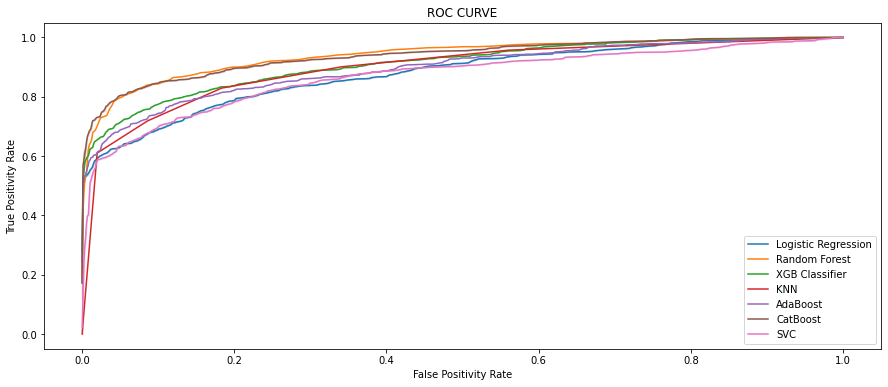

In [71]:
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

 we can infer that the best 4 models are Random Forest and CatBoost Classifier. Between them, Random Forest seems to be overfitting to some extent compared to other models. **CatBoost Classifier** is the second best performer, hence we can choose it  for hyperparameter tuning.

# **HYPERPARAMETER** **TUNING** 

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
# Creating a function for hyperparameter tuning
def GridFit(name, hyperparams, estim):
  '''Returns a dataframe with scores of the model post hyperparameter tuning along with best model and confusion matrix for train and test '''
  
  grid_df = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])

  grid = GridSearchCV(estimator= estim, param_grid = hyperparams, cv = 5, scoring = 'recall')

  grid.fit(X_train,y_train)

  best_model = grid.best_estimator_

  train_grid = best_model.predict(X_train)
  test_grid = best_model.predict(X_test)

  grid_train_accuracy = accuracy_score(y_train, train_grid)
  grid_test_accuracy = accuracy_score(y_test, test_grid)
  grid_train_precision = precision_score(y_train, train_grid)
  grid_test_precision = precision_score(y_test, test_grid)
  grid_train_recall = recall_score(y_train, train_grid)
  grid_test_recall = recall_score(y_test, test_grid)
  grid_train_roc_auc = roc_auc_score(y_train, train_grid)
  grid_test_roc_auc = roc_auc_score(y_test, test_grid)

  grid_df = grid_df.append({'Model': name,
                           'Train Accuracy' : grid_train_accuracy,
                           'Test Accuracy': grid_test_accuracy,
                           'Train Precision' : grid_train_precision,
                           'Test Precision' : grid_test_precision,
                           'Train Recall' : grid_train_recall,
                           'Test Recall' : grid_test_recall,
                           'Train ROC AUC' : grid_train_roc_auc,
                           'Test ROC AUC' : grid_test_roc_auc},
                           ignore_index = True)
  
  grid_train_cm = confusion_matrix(y_train, train_grid)
  grid_test_cm = confusion_matrix(y_test, test_grid)


  return best_model, grid_df, grid_train_cm, grid_test_cm

In [74]:
# Hyperparameter dictionary
CBdict ={'n_estimators' : [300,350],
                'max_depth': [7,8,9],
                'learning_rate': [0.01, 0.001]
                 }

In [76]:
CB_best_model,CB_df,CB_grid_train_cm,CB_grid_test_cm=GridFit('CBC',CBdict,CatBoostClassifier())

Streaming output truncated to the last 5000 lines.
300:	learn: 0.5354985	total: 2.47s	remaining: 402ms
301:	learn: 0.5352543	total: 2.47s	remaining: 393ms
302:	learn: 0.5350219	total: 2.48s	remaining: 385ms
303:	learn: 0.5345087	total: 2.5s	remaining: 378ms
304:	learn: 0.5339722	total: 2.51s	remaining: 370ms
305:	learn: 0.5337728	total: 2.52s	remaining: 362ms
306:	learn: 0.5335759	total: 2.52s	remaining: 354ms
307:	learn: 0.5333544	total: 2.53s	remaining: 345ms
308:	learn: 0.5331500	total: 2.54s	remaining: 337ms
309:	learn: 0.5329827	total: 2.55s	remaining: 329ms
310:	learn: 0.5328163	total: 2.56s	remaining: 320ms
311:	learn: 0.5322859	total: 2.56s	remaining: 312ms
312:	learn: 0.5320727	total: 2.58s	remaining: 305ms
313:	learn: 0.5315724	total: 2.59s	remaining: 297ms
314:	learn: 0.5313746	total: 2.6s	remaining: 289ms
315:	learn: 0.5310882	total: 2.61s	remaining: 281ms
316:	learn: 0.5308817	total: 2.62s	remaining: 272ms
317:	learn: 0.5306923	total: 2.62s	remaining: 264ms
318:	learn: 0.5

In [77]:
CB_best_model

In [78]:
CB_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,CBC,0.908685,0.837384,0.943366,0.86809,0.869284,0.797001,0.908626,0.837525


In [79]:
CB_grid_train_cm

array([[1913,  105],
       [ 263, 1749]])

In [80]:
CB_grid_test_cm

array([[756, 105],
       [176, 691]])

SHAP will help increase model explainability and enchance our predictions

In [81]:
# Install shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [82]:
import shap

In [83]:
# Creating instances of shap
explainer = shap.TreeExplainer(CB_best_model)
shap_values = explainer.shap_values(X_test)

In [84]:
shap_df = pd.DataFrame(X_test, columns = ['age',
 'sex',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'totChol',
 'BMI',
 'heartRate',
 'glucose',
 'PP',
 'education_1.0',
 'education_2.0',
 'education_3.0',
 'education_4.0'])

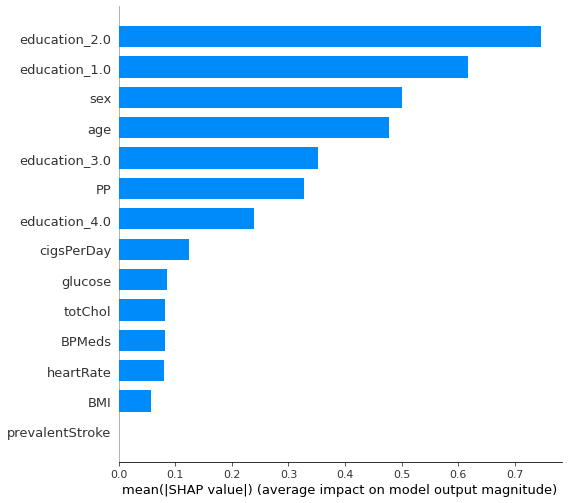

In [85]:
# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')